## Imports

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

In [2]:
tf.__version__

'2.10.0'

## Preprocessing



### Load dataset

In [6]:
from tensorflow.keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train = train_images.reshape((60000, 28, 28, 1))
print(train.shape)
y_train = train_labels
print(y_train.shape)
test = test_images.reshape((10000, 28, 28, 1))
print(test.shape)
y_test = test_labels
y_test.shape


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)


(10000,)

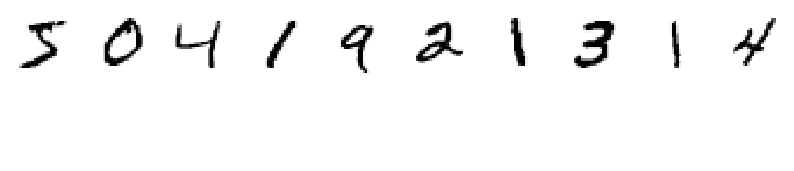

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(10,2))
for i in range(10):
    axs[0,i].matshow(np.squeeze(train[i]), cmap=plt.cm.Greys)
    #axs[1,i].matshow((np.squeeze(sample_edge_from_x[i])), cmap=plt.cm.Greys)
    axs[0,i].axis('off')
    axs[1,i].axis('off')

One Hot encoding



In [8]:
from keras.utils import to_categorical

y = to_categorical(y_train)
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Cross validation

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[:1000], y_train[:1000], test_size=0.3, random_state=123)

print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (700, 28, 28, 1)
y_train.shape (700,)
X_test.shape (300, 28, 28, 1)
y_test.shape (300,)


In [28]:
y = y_train.reshape(-1,1)

In [15]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [20]:
X_train.shape[1]

784

### Data normalization



In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('X_train mean', np.mean(X_train))
print('X_train standard deviation', np.std(X_train))

X_train mean 2.2787084820294756e-18
X_train standard deviation 0.8748177652797067


## Learning

### Creating the Logistic Regression

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train

In [42]:
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0851 - sparse_categorical_accuracy: 0.9957
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9971
Epoch 3/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9943
Epoch 4/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0719 - sparse_categorical_accuracy: 0.9957
Epoch 5/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0689 - sparse_categorical_accuracy: 0.9943
Epoch 6/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9971
Epoch 7/40
22/22 [==============================] - 0s 5ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9986
Epoch 8/40
22/22 [==============================] - 0s 4ms/step - loss: 0.0539 - sparse_categorical_accuracy: 1.0000
Epoch 9/40
22/22 [==============================] - 0s 4ms/step 

## Evaluation

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 6.1244 - sparse_categorical_accuracy: 0.1000


In [47]:
y_test_pred = model.predict(X_test)
print(y_test_pred[0].max())
print(y_test_pred[1].max())

10/10 [==============================] - 0s 4ms/step
0.5564358
0.5825877


In [19]:
print(model.get_weights()[0])
print(model.get_weights()[1])

[[-0.21551709  0.04544187  0.19904298]
 [ 0.18186337 -0.16578679 -0.06487003]
 [-0.2763915   0.09150375  0.23186293]
 [-0.267023    0.06517315  0.245585  ]]
[-0.08262867  0.02675044 -0.05810794]
